### Introduction to Deep4Rec

Brief practical introduction to Deep4Rec. We'll show how to load a dataset and train a model.

Check more examples in the [examples folder]()!

- Author: Marianne Linhares Monteiro ([github: mari-linhares](https://github.com/mari-linhares/), [twitter: hereismari](https://twitter.com/hereismari))


First let's import the required dependencies.

In [1]:
import sys

sys.path.append('../../')

import os
# Ignore some tensorflow logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from matplotlib import pyplot as plt
import tensorflow as tf

Now let's import Deep4Rec.

There are two main modules in deep4rec that you usually are going to use:
    
 * `datasets`: Common datasets used for Recommendation Systems evaluation already preprocessed and ready to be used.
 * `models`: Recommenders based on deep learning.
 
Let's import them.

In [2]:
from deep4rec import datasets
from deep4rec import models

We can choose any dataset listed in the datasets options.

In [3]:
datasets.options()

['frappe', 'ml-100k']

In [4]:
# Build chosen dataset
ds = datasets.build_dataset("ml-100k")

We can choose any model listed in the models options.

In [5]:
models.options()

['FM', 'NeuralFM', 'NeuralMF', 'WideDeep']

Let's start with the FM model.

In [6]:
fm = models.FM(ds, num_units=16)

In order to train a model just call `train`.

In [7]:
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.04

fm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.


W0713 00:36:15.670563 139979229038400 deprecation.py:323] From /home/marianne/anaconda3/envs/tfrec2/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py:532: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


W0713 00:36:15.683735 139979229038400 deprecation.py:323] From /home/marianne/anaconda3/envs/tfrec2/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py:667: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1, Time: 2.241126 (s)


 10%|█         | 1/10 [00:02<00:24,  2.68s/it]

------------ train losses ------------
rmse: 1.661485
------------ test losses ------------
rmse: 1.753535
Epoch 2, Time: 2.311220 (s)


 20%|██        | 2/10 [00:05<00:21,  2.70s/it]

------------ train losses ------------
rmse: 1.157575
------------ test losses ------------
rmse: 1.230991
Epoch 3, Time: 2.311941 (s)


 30%|███       | 3/10 [00:08<00:19,  2.72s/it]

------------ train losses ------------
rmse: 1.051600
------------ test losses ------------
rmse: 1.102781
Epoch 4, Time: 2.343267 (s)


 40%|████      | 4/10 [00:10<00:16,  2.74s/it]

------------ train losses ------------
rmse: 1.022742
------------ test losses ------------
rmse: 1.067871
Epoch 5, Time: 2.431573 (s)


 50%|█████     | 5/10 [00:13<00:13,  2.78s/it]

------------ train losses ------------
rmse: 1.006429
------------ test losses ------------
rmse: 1.051664
Epoch 6, Time: 2.493213 (s)


 60%|██████    | 6/10 [00:16<00:11,  2.83s/it]

------------ train losses ------------
rmse: 0.994421
------------ test losses ------------
rmse: 1.040811
Epoch 7, Time: 2.571654 (s)


 70%|███████   | 7/10 [00:19<00:08,  2.88s/it]

------------ train losses ------------
rmse: 0.985066
------------ test losses ------------
rmse: 1.032648
Epoch 8, Time: 2.622662 (s)


 80%|████████  | 8/10 [00:22<00:05,  2.94s/it]

------------ train losses ------------
rmse: 0.977580
------------ test losses ------------
rmse: 1.025955
Epoch 9, Time: 2.683743 (s)


 90%|█████████ | 9/10 [00:25<00:02,  3.00s/it]

------------ train losses ------------
rmse: 0.971465
------------ test losses ------------
rmse: 1.020237
Epoch 10, Time: 2.761095 (s)


100%|██████████| 10/10 [00:29<00:00,  3.06s/it]

------------ train losses ------------
rmse: 0.966377
------------ test losses ------------
rmse: 1.015443


Let's now try NeuralFM and NeuralMF models and compare them. We just need to add a few lines of code and we're ready to go!

In [8]:
neuralfm = models.NeuralFM(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralfm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, Time: 6.480566 (s)


 10%|█         | 1/10 [00:07<01:08,  7.64s/it]

------------ train losses ------------
rmse: 1.024890
------------ test losses ------------
rmse: 1.074355
Epoch 2, Time: 6.510606 (s)


 20%|██        | 2/10 [00:15<01:01,  7.66s/it]

------------ train losses ------------
rmse: 0.949548
------------ test losses ------------
rmse: 1.017224
Epoch 3, Time: 6.922195 (s)


 30%|███       | 3/10 [00:23<00:54,  7.82s/it]

------------ train losses ------------
rmse: 0.920511
------------ test losses ------------
rmse: 0.999701
Epoch 4, Time: 7.618742 (s)


 40%|████      | 4/10 [00:32<00:49,  8.18s/it]

------------ train losses ------------
rmse: 0.893687
------------ test losses ------------
rmse: 0.997797
Epoch 5, Time: 7.582307 (s)


 50%|█████     | 5/10 [00:41<00:42,  8.41s/it]

------------ train losses ------------
rmse: 0.866398
------------ test losses ------------
rmse: 0.993838
Epoch 6, Time: 7.877719 (s)


 60%|██████    | 6/10 [00:50<00:34,  8.64s/it]

------------ train losses ------------
rmse: 0.841301
------------ test losses ------------
rmse: 0.995234
Epoch 7, Time: 7.844462 (s)


 70%|███████   | 7/10 [00:59<00:26,  8.75s/it]

------------ train losses ------------
rmse: 0.818236
------------ test losses ------------
rmse: 0.996371
Epoch 8, Time: 7.354521 (s)


 80%|████████  | 8/10 [01:08<00:17,  8.74s/it]

------------ train losses ------------
rmse: 0.800418
------------ test losses ------------
rmse: 0.997138
Epoch 9, Time: 7.706514 (s)


 90%|█████████ | 9/10 [01:17<00:08,  8.79s/it]

------------ train losses ------------
rmse: 0.786009
------------ test losses ------------
rmse: 1.004901
Epoch 10, Time: 7.615034 (s)


100%|██████████| 10/10 [01:26<00:00,  8.83s/it]

------------ train losses ------------
rmse: 0.773966
------------ test losses ------------
rmse: 0.999964


All Deep Learning methods have the same interface and parameters so to use NeuralFM instead of NeuralFM we just need to use a different class name.

In [9]:
neuralmf = models.NeuralMF(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralmf.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


W0713 00:38:11.145842 139979229038400 deprecation.py:323] From /home/marianne/anaconda3/envs/tfrec2/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:163: setdiff1d (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Epoch 1, Time: 6.006647 (s)


 10%|█         | 1/10 [00:07<01:05,  7.29s/it]

------------ train losses ------------
rmse: 0.938839
------------ test losses ------------
rmse: 0.981646
Epoch 2, Time: 5.974779 (s)


 20%|██        | 2/10 [00:14<00:57,  7.21s/it]

------------ train losses ------------
rmse: 0.915705
------------ test losses ------------
rmse: 0.963150
Epoch 3, Time: 5.785814 (s)


 30%|███       | 3/10 [00:21<00:49,  7.12s/it]

------------ train losses ------------
rmse: 0.907646
------------ test losses ------------
rmse: 0.957724
Epoch 4, Time: 6.600795 (s)


 40%|████      | 4/10 [00:29<00:44,  7.34s/it]

------------ train losses ------------
rmse: 0.899784
------------ test losses ------------
rmse: 0.954491
Epoch 5, Time: 6.169102 (s)


 50%|█████     | 5/10 [00:36<00:36,  7.34s/it]

------------ train losses ------------
rmse: 0.895068
------------ test losses ------------
rmse: 0.950915
Epoch 6, Time: 5.921817 (s)


 60%|██████    | 6/10 [00:43<00:28,  7.23s/it]

------------ train losses ------------
rmse: 0.890903
------------ test losses ------------
rmse: 0.950296
Epoch 7, Time: 5.957404 (s)


 70%|███████   | 7/10 [00:50<00:21,  7.17s/it]

------------ train losses ------------
rmse: 0.886637
------------ test losses ------------
rmse: 0.948096
Epoch 8, Time: 6.156290 (s)


 80%|████████  | 8/10 [00:57<00:14,  7.19s/it]

------------ train losses ------------
rmse: 0.882957
------------ test losses ------------
rmse: 0.947587
Epoch 9, Time: 6.102559 (s)


 90%|█████████ | 9/10 [01:04<00:07,  7.18s/it]

------------ train losses ------------
rmse: 0.880251
------------ test losses ------------
rmse: 0.947511
Epoch 10, Time: 6.352031 (s)


100%|██████████| 10/10 [01:12<00:00,  7.25s/it]

------------ train losses ------------
rmse: 0.874450
------------ test losses ------------
rmse: 0.947710


Let's compare the metods. After training a model we can check their losses in each epoch using `model.test_losses` and `model.train_losses` (if we had a validation set we could also use `model.valid_losses`).

In [22]:
# utility function to plot model losses
def plot_losses(model):
    plt.title(type(model).__name__)
    plt.plot([loss["rmse"] for loss in model._losses['test']], label='test')
    plt.plot([loss["rmse"] for loss in model._losses['train']], label='train')
    plt.legend()
    plt.show()

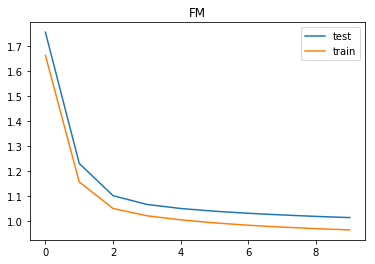

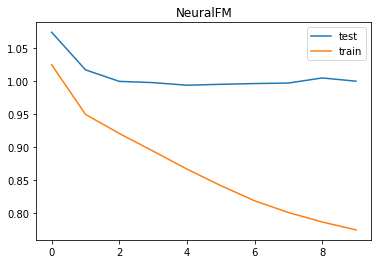

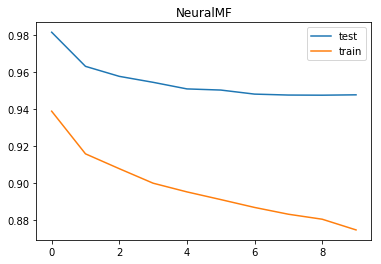

In [23]:
plot_losses(fm); plot_losses(neuralfm); plot_losses(neuralmf)

### What's next?

- Contribute to the code base! Feel free to create a PR with your contributions, if you don't know from where start check the open issues.
- Check the examples folder